# PCA + SVM anomaly detection

### Imports

In [1]:
import pandas as pd
import numpy as np

from functools import partial
import re
import os
import time
import tensorboard
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def load_files_list(directory):
    '''
    Load the audiofiles inside a directory.
    '''
    return os.listdir(directory)

## Loading the descriptors (1D)

In [3]:
DIRECTORY = '/home/belen_alastruey/PYTHON/Autoencoder/'

In [4]:
anomalies_path = DIRECTORY + 'DescriptorsAnomalies/'

In [5]:
files = load_files_list(anomalies_path)

## Valve

### Read .npy

In [38]:
descriptors= []
labels = []
for file in files:
    if "valve" in file:
        descr = np.load(anomalies_path + file)
        descriptors.append(descr)
        labels.append(re.split(r'_', file)[1])

In [40]:
descr = np.asarray(descriptors)

In [42]:
descr = descr.reshape(descr.shape[0], descr.shape[2])

In [9]:
#descr = StandardScaler().fit_transform(descr)

In [476]:
df = pd.DataFrame(descr)

In [477]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,6.802627,0.0,0.432982,2.920322,0.000000,0.000000,0.001629,0.0,6.672117,0.283796,...,0.713513,0.000000,0.297841,0.886518,0.0,1.708965,0.148095,2.767248,0.108138,0.037086
1,4.216579,0.0,0.310207,1.259205,0.024619,0.000000,0.029194,0.0,3.212135,0.267401,...,1.027022,0.325941,0.183674,0.407776,0.0,1.439884,0.014214,0.862978,0.110475,0.291279
2,4.499004,0.0,0.297627,1.628578,0.066369,0.000000,0.000000,0.0,4.788225,0.019641,...,0.545522,0.000000,0.034508,0.160365,0.0,1.081589,0.021064,1.688208,0.444352,0.023977
3,8.086576,0.0,0.278967,1.352538,0.011167,0.000000,0.000000,0.0,2.610033,0.005783,...,0.810460,0.000467,0.274949,0.058397,0.0,1.377139,0.044042,0.723359,0.006183,0.152689
4,4.619640,0.0,0.313929,0.904351,0.000000,0.000000,0.000000,0.0,2.757633,0.208981,...,0.344815,0.000000,0.202990,0.136599,0.0,0.601835,0.036846,1.142011,0.301534,0.035734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,11.935277,0.0,0.552960,2.751236,0.266298,0.000000,0.000861,0.0,8.080318,0.009568,...,0.626025,0.000000,0.085197,0.913742,0.0,1.744722,0.213299,2.802969,0.022955,0.564665
1106,4.535381,0.0,0.395083,1.112056,0.000000,0.000000,0.000000,0.0,2.695288,0.066500,...,0.646907,0.000000,0.453202,0.298911,0.0,0.922492,0.139982,0.715493,0.000000,0.000000
1107,4.149576,0.0,0.801715,1.241915,0.314711,0.045899,0.000000,0.0,4.278568,3.169002,...,0.309701,0.000000,0.048288,0.581810,0.0,0.620522,0.170367,2.200248,2.535819,0.192464
1108,1.648216,0.0,0.044452,0.361309,0.182067,0.000000,0.000000,0.0,0.720972,0.062876,...,0.348728,0.020684,0.383477,0.869030,0.0,0.831338,0.017944,0.378747,0.074052,0.937045


In [478]:
pca = PCA(10)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [479]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio: [0.33526126 0.21174374 0.06743488 0.05791297 0.0395424  0.0255483
 0.02414288 0.02105863 0.01702948 0.01478838]


In [480]:
suma=0
for e in pca.explained_variance_ratio_:
    suma = suma + e

In [481]:
suma

0.8144629104062915

In [482]:
x_pca["labels"]=labels

In [483]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,labels
0,-8.469501,2.266927,-1.498381,3.239172,0.386748,0.272594,-0.560733,1.348437,0.730954,0.835953,normal
1,-1.994266,-5.836478,-0.171596,-0.155952,-1.146341,-1.655083,0.754134,0.267700,-0.267193,-1.193232,normal
2,-3.057374,-3.511380,0.278413,-0.435550,-2.408957,-0.772868,2.472917,0.159075,-1.028381,1.629763,normal
3,-1.033225,1.223436,2.133328,-4.209067,0.205931,0.224296,1.426087,1.615887,-0.095247,-0.391994,normal
4,-0.236889,-5.154711,-1.639192,1.384547,-0.982464,-0.075116,-0.681353,-1.614876,-0.619701,-0.611106,normal
...,...,...,...,...,...,...,...,...,...,...,...
1105,-13.693279,5.000143,1.909189,-1.175130,1.234225,-0.747987,3.587972,1.310160,0.367950,-1.911943,normal
1106,1.279119,-1.943877,-3.110882,1.336930,1.787811,1.786746,-1.414043,1.452018,-1.596984,0.327836,normal
1107,-2.358890,-4.059770,3.107179,-0.361128,-2.113436,2.568671,0.634103,-1.578795,-0.755324,1.098869,normal
1108,3.425003,-9.156985,-0.180246,1.074591,-0.786016,-1.424742,0.970563,1.246021,2.021976,-1.454926,abnormal


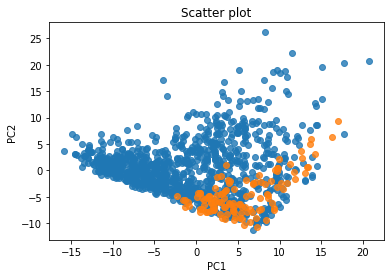

In [484]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="normal"], x_pca["PC2"].loc[x_pca["labels"]=="normal"], alpha=0.8)
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="abnormal"], x_pca["PC2"].loc[x_pca["labels"]=="abnormal"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('valve.pdf')
plt.show()

## SVM

In [485]:
y = x_pca['labels']

In [486]:
x_pca.drop('labels', axis=1, inplace = True)


In [487]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.469501,2.266927,-1.498381,3.239172,0.386748,0.272594,-0.560733,1.348437,0.730954,0.835953
1,-1.994266,-5.836478,-0.171596,-0.155952,-1.146341,-1.655083,0.754134,0.267700,-0.267193,-1.193232
2,-3.057374,-3.511380,0.278413,-0.435550,-2.408957,-0.772868,2.472917,0.159075,-1.028381,1.629763
3,-1.033225,1.223436,2.133328,-4.209067,0.205931,0.224296,1.426087,1.615887,-0.095247,-0.391994
4,-0.236889,-5.154711,-1.639192,1.384547,-0.982464,-0.075116,-0.681353,-1.614876,-0.619701,-0.611106
...,...,...,...,...,...,...,...,...,...,...
1105,-13.693279,5.000143,1.909189,-1.175130,1.234225,-0.747987,3.587972,1.310160,0.367950,-1.911943
1106,1.279119,-1.943877,-3.110882,1.336930,1.787811,1.786746,-1.414043,1.452018,-1.596984,0.327836
1107,-2.358890,-4.059770,3.107179,-0.361128,-2.113436,2.568671,0.634103,-1.578795,-0.755324,1.098869
1108,3.425003,-9.156985,-0.180246,1.074591,-0.786016,-1.424742,0.970563,1.246021,2.021976,-1.454926


In [488]:
from sklearn.model_selection import train_test_split

In [489]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, stratify = labels, random_state=100 )

In [490]:
from sklearn.svm import SVC

In [491]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [492]:
y_pred=svclassifier.predict(X_test)

In [493]:
from sklearn.metrics import classification_report, confusion_matrix

In [494]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    abnormal       0.83      0.69      0.76        36
      normal       0.96      0.98      0.97       297

    accuracy                           0.95       333
   macro avg       0.90      0.84      0.87       333
weighted avg       0.95      0.95      0.95       333



In [495]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[ 25  11]
 [  5 292]]
accuracy 0.9519519519519519


In [498]:
#accuracy si classifiquem tots com normal
normal = []
for i in range(y_test.shape[0]):
    normal.append("normal")
    
normal = np.asarray(normal)

In [499]:
cm = confusion_matrix(y_test,normal)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[  0  36]
 [  0 297]]
accuracy 0.8918918918918919


## Fan

### Read .npy

In [33]:
descriptors= []
labels = []
for file in files:
    if "fan" in file:
        descr = np.load(anomalies_path + file)
        descriptors.append(descr)
        labels.append(re.split(r'_', file)[1])

In [34]:
descr = np.asarray(descriptors)

In [32]:
descr = descr.reshape(descr.shape[0], descr.shape[2])

In [503]:
#descr = StandardScaler().fit_transform(descr)

In [504]:
df = pd.DataFrame(descr)

In [505]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.0,0.035542,0.000430,0.000000,0.000000,0.000000,0.0,0.008013,0.471973,...,0.055514,0.000000,0.409308,0.003925,0.0,0.024361,0.000000,0.000000,0.040971,0.000000
1,0.918507,0.0,0.162688,0.043530,0.003212,0.003826,0.000000,0.0,1.354382,0.140226,...,0.146651,0.000000,0.137192,0.106491,0.0,0.133899,0.073928,0.365442,1.108380,0.005535
2,0.000000,0.0,0.117170,0.172098,0.038004,0.000000,0.022539,0.0,0.000000,0.262481,...,0.061582,0.000000,0.006506,0.001281,0.0,0.040052,0.000000,0.000000,0.816811,0.047936
3,0.000000,0.0,0.068065,0.019509,0.000000,0.000000,0.002880,0.0,0.000000,0.000000,...,0.048718,0.000000,1.056819,0.003764,0.0,0.010687,0.000000,0.000000,0.023253,0.000000
4,0.000000,0.0,0.594460,0.960085,0.342105,0.011601,0.746853,0.0,0.021524,0.097163,...,0.220256,0.002652,0.649772,0.025036,0.0,0.258117,0.187174,0.000000,0.338146,0.091844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0.005883,0.0,0.348760,0.121136,0.022119,0.000000,0.000000,0.0,0.002137,0.385283,...,0.188597,0.024072,0.071010,0.013744,0.0,0.121570,0.010234,0.013093,0.378284,0.027207
1414,0.000000,0.0,0.060490,0.017767,0.010796,0.000000,0.378376,0.0,0.000000,0.036916,...,0.121698,0.019030,1.218608,0.012615,0.0,0.037352,0.000000,0.000000,0.577358,0.017394
1415,0.000000,0.0,0.076224,0.182675,0.042259,0.000000,0.032890,0.0,0.000000,0.568300,...,0.026228,0.000000,0.334430,0.005696,0.0,0.033319,0.000000,0.000000,0.018485,0.067948
1416,0.000000,0.0,0.066627,0.038549,0.004003,0.000000,0.006490,0.0,0.000000,0.002582,...,0.132484,0.076293,0.182080,0.004464,0.0,0.142421,0.000000,0.000000,0.838685,0.243639


In [506]:
pca = PCA(6)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [507]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio: [0.3919097  0.20158672 0.0753125  0.06186137 0.04457075 0.02675449]


In [508]:
suma=0
for e in pca.explained_variance_ratio_:
    suma = suma + e

In [509]:
suma

0.8019955232739449

In [510]:
x_pca["labels"]=labels

In [511]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,labels
0,-3.960926,1.718539,-2.174144,-1.168352,-0.826465,-0.278574,normal
1,-0.121295,3.318543,-0.273067,-2.265022,1.185809,-0.198405,normal
2,-3.228892,-3.842992,2.588113,0.583798,-0.571850,-1.672587,normal
3,8.284109,-3.502176,-8.521827,-1.988025,-0.427201,2.034268,abnormal
4,2.404949,-1.330940,1.812239,4.530112,-2.307078,1.092598,normal
...,...,...,...,...,...,...,...
1413,-2.760344,1.246055,-0.864933,-0.847196,-0.313885,-0.780632,normal
1414,7.563453,-2.797258,-1.532217,2.123763,-0.512828,0.184953,normal
1415,-1.461407,-4.893533,0.056306,-0.419701,-2.316104,-0.588897,normal
1416,5.549628,-0.872867,-0.644795,4.941761,0.113913,-4.701476,normal


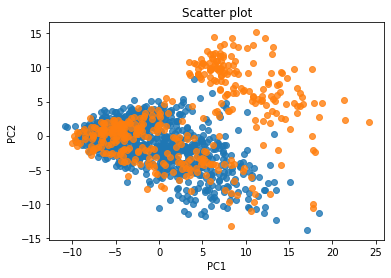

In [512]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="normal"], x_pca["PC2"].loc[x_pca["labels"]=="normal"], alpha=0.8)
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="abnormal"], x_pca["PC2"].loc[x_pca["labels"]=="abnormal"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('valve.pdf')
plt.show()

## SVM

In [513]:
y = x_pca['labels']

In [514]:
x_pca.drop('labels', axis=1, inplace = True)


In [515]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.960926,1.718539,-2.174144,-1.168352,-0.826465,-0.278574
1,-0.121295,3.318543,-0.273067,-2.265022,1.185809,-0.198405
2,-3.228892,-3.842992,2.588113,0.583798,-0.571850,-1.672587
3,8.284109,-3.502176,-8.521827,-1.988025,-0.427201,2.034268
4,2.404949,-1.330940,1.812239,4.530112,-2.307078,1.092598
...,...,...,...,...,...,...
1413,-2.760344,1.246055,-0.864933,-0.847196,-0.313885,-0.780632
1414,7.563453,-2.797258,-1.532217,2.123763,-0.512828,0.184953
1415,-1.461407,-4.893533,0.056306,-0.419701,-2.316104,-0.588897
1416,5.549628,-0.872867,-0.644795,4.941761,0.113913,-4.701476


In [516]:
from sklearn.model_selection import train_test_split

In [517]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, stratify = labels, random_state=100 )

In [518]:
from sklearn.svm import SVC

In [519]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [520]:
y_pred=svclassifier.predict(X_test)

In [521]:
from sklearn.metrics import classification_report, confusion_matrix

In [522]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    abnormal       0.90      0.30      0.45       122
      normal       0.78      0.99      0.87       304

    accuracy                           0.79       426
   macro avg       0.84      0.65      0.66       426
weighted avg       0.81      0.79      0.75       426



In [523]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[ 37  85]
 [  4 300]]
accuracy 0.7910798122065728


In [526]:
#accuracy si classifiquem tots com normal
normal = []
for i in range(y_test.shape[0]):
    normal.append("normal")
    
normal = np.asarray(normal)

In [527]:
cm = confusion_matrix(y_test,normal)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[  0 122]
 [  0 304]]
accuracy 0.7136150234741784


## Pump

### Read .npy

In [43]:
descriptors= []
labels = []
for file in files:
    if "pump" in file:
        descr = np.load(anomalies_path + file)
        descriptors.append(descr)
        labels.append(re.split(r'_', file)[1])

In [44]:
descr = np.asarray(descriptors)

In [45]:
descr = descr.reshape(descr.shape[0], descr.shape[2])

In [531]:
#descr = StandardScaler().fit_transform(descr)

In [532]:
df = pd.DataFrame(descr)

In [533]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.230058,0.0,0.573972,0.019101,0.110222,0.271257,0.000000,0.0,0.139840,0.007036,...,0.491892,1.063541,0.450068,0.237357,0.0,0.154016,0.277367,0.051204,0.039889,0.176187
1,0.598811,0.0,0.252623,0.243006,0.052105,0.131129,0.000000,0.0,0.977738,0.085483,...,0.198302,0.004688,0.248027,0.289691,0.0,0.176103,0.033621,0.783211,0.242328,0.049245
2,0.302545,0.0,0.281225,0.032613,0.000000,0.330910,0.070889,0.0,0.675696,0.462632,...,0.176435,0.072819,1.836776,0.294336,0.0,0.165840,0.037671,0.380114,2.364321,0.354526
3,0.423436,0.0,0.169628,0.132224,0.002472,0.000000,0.011157,0.0,0.811540,0.100560,...,0.351946,0.000000,0.384620,0.498682,0.0,0.296388,0.076929,0.269984,0.472589,0.018631
4,0.361631,0.0,0.129778,0.520517,0.187973,0.007405,0.053326,0.0,1.052666,0.144338,...,0.183674,0.011701,0.238953,0.754644,0.0,0.284103,0.031351,0.741277,1.147987,0.047289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0.000000,0.0,0.140073,0.130369,0.000000,0.000000,0.805203,0.0,0.000000,1.206249,...,0.064214,0.000000,1.744912,0.000527,0.0,0.047614,0.000472,0.000000,0.655107,0.680421
1145,0.577345,0.0,0.046542,0.116677,0.016177,0.068796,0.080694,0.0,1.000840,0.123604,...,0.190513,0.000000,0.023379,0.465280,0.0,0.249366,0.002218,0.539874,0.220783,0.042473
1146,0.133074,0.0,0.051560,0.009693,0.028945,0.392172,0.000000,0.0,1.939800,0.010499,...,0.245498,0.173088,0.713618,0.698880,0.0,0.370798,0.050295,1.631253,0.000535,0.014179
1147,0.170212,0.0,0.167271,0.313634,0.057117,0.209221,0.000000,0.0,1.078652,0.140395,...,0.335350,0.011368,1.361728,0.262680,0.0,0.309552,0.011781,0.824001,0.190261,1.297523


In [534]:
pca = PCA(13)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']

In [535]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio: [0.2874871  0.11189734 0.09914076 0.05432388 0.04547113 0.04160582
 0.03556384 0.03120134 0.029766   0.02321602 0.01785693 0.01686399
 0.01588796]


In [536]:
suma=0
for e in pca.explained_variance_ratio_:
    suma = suma + e

In [537]:
suma

0.8102821055799723

In [538]:
x_pca["labels"]=labels

In [539]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,labels
0,-3.391059,-2.111626,-3.259706,0.630745,-1.779972,-1.313162,-2.917071,-0.130213,0.753384,1.270782,1.043641,1.473439,0.107042,abnormal
1,-2.903323,-0.423087,0.180418,0.866017,0.621512,0.172867,-0.141074,-1.387639,-0.539436,0.647871,-0.660111,-0.166205,0.007397,normal
2,-0.040163,0.538126,-6.005744,2.860055,-0.220734,-1.515465,-1.692455,3.808957,-0.033303,-2.171310,-1.769533,-0.241976,-1.213420,abnormal
3,-3.726164,1.431628,1.014534,-1.338511,-0.367365,1.471357,-0.864920,-0.606971,0.292307,-0.498697,-0.670593,-0.531366,-0.170194,normal
4,-1.731284,0.120095,-0.606185,0.849141,0.891576,0.316144,0.479996,-1.792810,-0.304222,0.349758,0.211290,0.752275,0.131887,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,5.428759,-0.268969,-4.765491,-0.945133,2.666030,5.789773,-1.173151,2.760370,0.211243,1.827717,1.209576,0.249059,3.095390,abnormal
1145,-3.762237,-1.969583,-1.344267,1.195596,1.577141,0.825491,0.069655,-1.433542,-1.375772,0.006995,-0.195234,-0.205276,-0.453853,normal
1146,-3.865118,-2.754694,-2.587161,2.215410,0.445974,-3.988375,-1.897706,2.555439,0.845395,-0.868923,1.121510,0.717024,-1.433339,abnormal
1147,9.533074,-4.314875,3.709510,-4.447306,1.638125,0.057758,-1.954508,0.044094,2.176637,0.357943,-2.668187,0.400673,-1.006969,normal


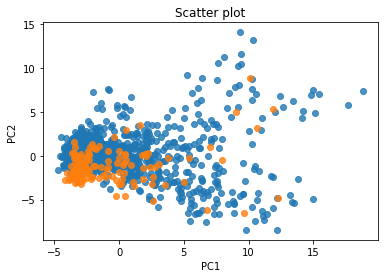

In [540]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="normal"], x_pca["PC2"].loc[x_pca["labels"]=="normal"], alpha=0.8)
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="abnormal"], x_pca["PC2"].loc[x_pca["labels"]=="abnormal"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('valve.pdf')
plt.show()

## SVM

In [541]:
y = x_pca['labels']

In [542]:
x_pca.drop('labels', axis=1, inplace = True)


In [543]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.391059,-2.111626,-3.259706,0.630745,-1.779972,-1.313162,-2.917071,-0.130213,0.753384,1.270782,1.043641,1.473439,0.107042
1,-2.903323,-0.423087,0.180418,0.866017,0.621512,0.172867,-0.141074,-1.387639,-0.539436,0.647871,-0.660111,-0.166205,0.007397
2,-0.040163,0.538126,-6.005744,2.860055,-0.220734,-1.515465,-1.692455,3.808957,-0.033303,-2.171310,-1.769533,-0.241976,-1.213420
3,-3.726164,1.431628,1.014534,-1.338511,-0.367365,1.471357,-0.864920,-0.606971,0.292307,-0.498697,-0.670593,-0.531366,-0.170194
4,-1.731284,0.120095,-0.606185,0.849141,0.891576,0.316144,0.479996,-1.792810,-0.304222,0.349758,0.211290,0.752275,0.131887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,5.428759,-0.268969,-4.765491,-0.945133,2.666030,5.789773,-1.173151,2.760370,0.211243,1.827717,1.209576,0.249059,3.095390
1145,-3.762237,-1.969583,-1.344267,1.195596,1.577141,0.825491,0.069655,-1.433542,-1.375772,0.006995,-0.195234,-0.205276,-0.453853
1146,-3.865118,-2.754694,-2.587161,2.215410,0.445974,-3.988375,-1.897706,2.555439,0.845395,-0.868923,1.121510,0.717024,-1.433339
1147,9.533074,-4.314875,3.709510,-4.447306,1.638125,0.057758,-1.954508,0.044094,2.176637,0.357943,-2.668187,0.400673,-1.006969


In [544]:
from sklearn.model_selection import train_test_split

In [545]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, stratify = labels, random_state=100 )

In [546]:
from sklearn.svm import SVC

In [547]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [548]:
y_pred=svclassifier.predict(X_test)

In [549]:
from sklearn.metrics import classification_report, confusion_matrix

In [550]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 29  14]
 [  5 297]]
              precision    recall  f1-score   support

    abnormal       0.85      0.67      0.75        43
      normal       0.95      0.98      0.97       302

    accuracy                           0.94       345
   macro avg       0.90      0.83      0.86       345
weighted avg       0.94      0.94      0.94       345



In [551]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[ 29  14]
 [  5 297]]
accuracy 0.9449275362318841


In [552]:
#accuracy si classifiquem tots com normal
normal = []
for i in range(y_test.shape[0]):
    normal.append("normal")
    
normal = np.asarray(normal)

In [553]:
cm = confusion_matrix(y_test,normal)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[  0  43]
 [  0 302]]
accuracy 0.8753623188405797


## Slider

### Read .npy

In [47]:
descriptors= []
labels = []
for file in files:
    if "slider" in file:
        descr = np.load(anomalies_path + file)
        descriptors.append(descr)
        labels.append(re.split(r'_', file)[1])

In [48]:
descr = np.asarray(descriptors)

In [556]:
descr = descr.reshape(descr.shape[0], descr.shape[2])

In [557]:
#descr = StandardScaler().fit_transform(descr)

In [558]:
df = pd.DataFrame(descr)

In [559]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.136863,0.0,1.482619,1.232309,0.105342,0.530510,0.280410,0.0,0.791064,1.735079,...,2.922549,0.017075,0.186808,0.359925,0.0,2.097879,0.238149,0.205819,4.853341,1.029904
1,0.148317,0.0,1.173115,1.854861,0.832404,0.000000,0.137959,0.0,0.027310,0.385208,...,0.378654,0.000000,0.078287,0.023970,0.0,0.388470,0.410016,0.009396,0.753085,0.289853
2,0.000000,0.0,1.129405,0.581483,0.002211,0.562704,0.486181,0.0,0.000000,0.673334,...,1.428394,0.190051,1.590005,0.005540,0.0,0.359836,0.353378,0.073240,1.118054,0.124014
3,0.000000,0.0,0.347928,0.270658,0.000000,0.000000,0.000000,0.0,0.040337,0.257341,...,0.702541,0.194123,0.126794,0.000000,0.0,0.247319,0.087437,0.028523,3.748480,0.132514
4,0.849225,0.0,0.346794,0.874764,0.694226,0.082919,0.149246,0.0,0.572131,1.982870,...,2.417514,0.020716,0.372931,0.177748,0.0,0.790222,0.172332,0.219985,4.207776,1.607589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,0.000000,0.0,0.085765,0.261157,0.000000,0.049627,0.541856,0.0,0.000000,1.343672,...,0.425177,0.027291,1.128145,0.022732,0.0,0.236846,0.000000,0.000000,1.487158,1.737303
1420,0.973718,0.0,0.336378,0.143944,0.510617,0.000628,0.052396,0.0,0.455001,0.709414,...,0.325960,0.006127,0.284813,0.115560,0.0,0.331618,0.097464,0.173054,2.054636,0.510094
1421,0.000000,0.0,0.135048,0.477492,0.000000,0.000000,0.025184,0.0,0.000000,0.029423,...,0.524050,0.006020,1.474215,0.004883,0.0,0.177816,0.024577,0.000000,1.545864,0.000000
1422,0.973666,0.0,0.982519,2.126675,0.101877,0.000000,0.000000,0.0,0.218395,0.149236,...,1.819067,0.491983,0.524710,0.063078,0.0,0.782373,0.067141,0.043210,0.434038,0.051136


In [560]:
pca = PCA(10)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [561]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio: [0.23636174 0.14811613 0.10092987 0.09224246 0.07222352 0.04454121
 0.04404387 0.03069943 0.02491205 0.02022057]


In [562]:
suma=0
for e in pca.explained_variance_ratio_:
    suma = suma + e

In [563]:
suma

0.8142908420413733

In [564]:
x_pca["labels"]=labels

In [565]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,labels
0,-12.553100,3.040525,-4.088529,8.953964,4.792136,1.887323,-0.142614,0.884216,1.309688,-0.131613,abnormal
1,0.437655,-1.879603,5.653603,-2.842367,2.135755,2.459926,-0.743122,1.544007,3.808959,3.641505,normal
2,10.316724,2.175325,-2.002713,4.639588,-5.771673,-4.447259,3.044562,3.223040,-0.275764,1.005131,normal
3,-2.085865,-4.570525,-1.107347,0.810381,-1.363473,-0.120462,1.793650,0.052913,-1.342470,-0.161421,normal
4,-9.113194,4.490242,-4.386134,5.643007,7.080253,-0.372392,3.969511,-1.168256,0.930753,-0.196973,abnormal
...,...,...,...,...,...,...,...,...,...,...,...
1419,4.020563,0.851205,-3.730085,0.379943,-0.956264,2.097247,1.001150,-2.791650,0.506951,-0.392383,normal
1420,-3.993090,6.108213,0.169093,-2.704421,0.411209,-0.324310,-0.883482,-0.179394,1.436832,1.679391,abnormal
1421,0.807023,-5.970654,-0.576596,-1.145987,-0.661125,0.375131,0.734775,-0.649781,0.241063,0.408544,normal
1422,2.941895,-3.213462,0.221836,0.519560,0.700944,-0.874463,-5.221821,1.360091,-0.043599,-0.507037,abnormal


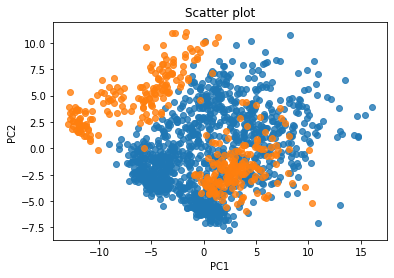

In [566]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="normal"], x_pca["PC2"].loc[x_pca["labels"]=="normal"], alpha=0.8)
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="abnormal"], x_pca["PC2"].loc[x_pca["labels"]=="abnormal"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('valve.pdf')
plt.show()

## SVM

In [567]:
y = x_pca['labels']

In [568]:
x_pca.drop('labels', axis=1, inplace = True)


In [569]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-12.553100,3.040525,-4.088529,8.953964,4.792136,1.887323,-0.142614,0.884216,1.309688,-0.131613
1,0.437655,-1.879603,5.653603,-2.842367,2.135755,2.459926,-0.743122,1.544007,3.808959,3.641505
2,10.316724,2.175325,-2.002713,4.639588,-5.771673,-4.447259,3.044562,3.223040,-0.275764,1.005131
3,-2.085865,-4.570525,-1.107347,0.810381,-1.363473,-0.120462,1.793650,0.052913,-1.342470,-0.161421
4,-9.113194,4.490242,-4.386134,5.643007,7.080253,-0.372392,3.969511,-1.168256,0.930753,-0.196973
...,...,...,...,...,...,...,...,...,...,...
1419,4.020563,0.851205,-3.730085,0.379943,-0.956264,2.097247,1.001150,-2.791650,0.506951,-0.392383
1420,-3.993090,6.108213,0.169093,-2.704421,0.411209,-0.324310,-0.883482,-0.179394,1.436832,1.679391
1421,0.807023,-5.970654,-0.576596,-1.145987,-0.661125,0.375131,0.734775,-0.649781,0.241063,0.408544
1422,2.941895,-3.213462,0.221836,0.519560,0.700944,-0.874463,-5.221821,1.360091,-0.043599,-0.507037


In [570]:
from sklearn.model_selection import train_test_split

In [571]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, stratify = labels, random_state=100 )

In [572]:
from sklearn.svm import SVC

In [573]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [574]:
y_pred=svclassifier.predict(X_test)

In [575]:
from sklearn.metrics import classification_report, confusion_matrix

In [576]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    abnormal       0.91      0.93      0.92       107
      normal       0.97      0.97      0.97       321

    accuracy                           0.96       428
   macro avg       0.94      0.95      0.94       428
weighted avg       0.96      0.96      0.96       428



In [577]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[ 99   8]
 [ 10 311]]
accuracy 0.9579439252336449


In [578]:
#accuracy si classifiquem tots com normal
normal = []
for i in range(y_test.shape[0]):
    normal.append("normal")
    
normal = np.asarray(normal)

In [579]:
cm = confusion_matrix(y_test,normal)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[  0 107]
 [  0 321]]
accuracy 0.75


## All

### Read .npy

In [50]:
descriptors= []
labels = []
for file in files:
    descr = np.load(anomalies_path + file)
    descriptors.append(descr)
    labels.append(re.split(r'_', file)[1])

In [51]:
descr = np.asarray(descriptors)

In [52]:
descr = descr.reshape(descr.shape[0], descr.shape[2])

In [583]:
#descr = StandardScaler().fit_transform(descr)

In [584]:
df = pd.DataFrame(descr)

In [585]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.0,0.035542,0.000430,0.000000,0.000000,0.000000,0.0,0.008013,0.471973,...,0.055514,0.000000,0.409308,0.003925,0.0,0.024361,0.000000,0.000000,0.040971,0.000000
1,6.802627,0.0,0.432982,2.920322,0.000000,0.000000,0.001629,0.0,6.672117,0.283796,...,0.713513,0.000000,0.297841,0.886518,0.0,1.708965,0.148095,2.767248,0.108138,0.037086
2,0.918507,0.0,0.162688,0.043530,0.003212,0.003826,0.000000,0.0,1.354382,0.140226,...,0.146651,0.000000,0.137192,0.106491,0.0,0.133899,0.073928,0.365442,1.108380,0.005535
3,0.000000,0.0,0.117170,0.172098,0.038004,0.000000,0.022539,0.0,0.000000,0.262481,...,0.061582,0.000000,0.006506,0.001281,0.0,0.040052,0.000000,0.000000,0.816811,0.047936
4,0.230058,0.0,0.573972,0.019101,0.110222,0.271257,0.000000,0.0,0.139840,0.007036,...,0.491892,1.063541,0.450068,0.237357,0.0,0.154016,0.277367,0.051204,0.039889,0.176187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,8.738938,0.0,0.888603,3.212713,0.004701,0.024301,0.013856,0.0,9.086124,0.526193,...,0.946870,0.000000,0.659624,0.952362,0.0,2.174471,0.588857,3.375131,0.076092,0.120610
5097,0.170212,0.0,0.167271,0.313634,0.057117,0.209221,0.000000,0.0,1.078652,0.140395,...,0.335350,0.011368,1.361728,0.262680,0.0,0.309552,0.011781,0.824001,0.190261,1.297523
5098,0.973666,0.0,0.982519,2.126675,0.101877,0.000000,0.000000,0.0,0.218395,0.149236,...,1.819067,0.491983,0.524710,0.063078,0.0,0.782373,0.067141,0.043210,0.434038,0.051136
5099,0.002849,0.0,0.093278,0.792006,0.021098,0.000000,0.080768,0.0,0.008650,0.227295,...,0.469465,0.043914,2.669238,0.035933,0.0,0.462581,0.027617,0.175942,0.187312,0.635691


In [586]:
pca = PCA(9)
x_pca = pca.fit_transform(df)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

In [587]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio: [0.22776774 0.1821542  0.155431   0.07717016 0.04264525 0.03666896
 0.03240208 0.02555123 0.02465235]


In [588]:
suma=0
for e in pca.explained_variance_ratio_:
    suma = suma + e

In [589]:
suma

0.8044429738074541

In [590]:
x_pca["labels"]=labels

In [591]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,labels
0,-1.906896,2.780852,-5.993163,1.578529,-0.088439,-1.312417,-0.611420,-0.374518,0.929242,normal
1,15.948305,4.233183,3.636316,2.740748,1.728646,-1.978648,-1.165633,-1.871854,-0.572463,normal
2,-2.531100,5.168076,-4.088693,3.958787,2.358552,-2.305524,0.104265,0.862377,0.384518,normal
3,-2.932652,0.891314,-1.293148,0.449249,0.090425,2.761715,-2.897025,0.032244,-1.667570,normal
4,1.252163,-3.628429,-5.905255,-2.562065,-1.252977,0.896158,0.819898,-0.274821,-0.683635,abnormal
...,...,...,...,...,...,...,...,...,...,...
5096,20.808609,1.692701,4.193604,4.136216,-0.179984,-2.080125,0.890617,-0.610552,0.577636,normal
5097,-1.856997,3.949682,2.227271,-9.294239,-2.868082,-3.505993,-0.953793,-3.804204,0.877178,normal
5098,-2.393311,-7.077892,4.720022,4.112726,-1.378008,-1.133028,-1.198203,-1.101389,-1.662189,abnormal
5099,-4.384810,-2.542078,3.776544,-1.702217,-5.209026,-1.957254,2.959367,1.640766,0.322329,normal


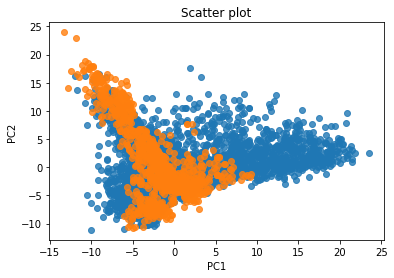

In [592]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="normal"], x_pca["PC2"].loc[x_pca["labels"]=="normal"], alpha=0.8)
plt.scatter(x_pca["PC1"].loc[x_pca["labels"]=="abnormal"], x_pca["PC2"].loc[x_pca["labels"]=="abnormal"], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('valve.pdf')
plt.show()

## SVM

In [593]:
y = x_pca['labels']

In [594]:
x_pca.drop('labels', axis=1, inplace = True)


In [595]:
x_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.906896,2.780852,-5.993163,1.578529,-0.088439,-1.312417,-0.611420,-0.374518,0.929242
1,15.948305,4.233183,3.636316,2.740748,1.728646,-1.978648,-1.165633,-1.871854,-0.572463
2,-2.531100,5.168076,-4.088693,3.958787,2.358552,-2.305524,0.104265,0.862377,0.384518
3,-2.932652,0.891314,-1.293148,0.449249,0.090425,2.761715,-2.897025,0.032244,-1.667570
4,1.252163,-3.628429,-5.905255,-2.562065,-1.252977,0.896158,0.819898,-0.274821,-0.683635
...,...,...,...,...,...,...,...,...,...
5096,20.808609,1.692701,4.193604,4.136216,-0.179984,-2.080125,0.890617,-0.610552,0.577636
5097,-1.856997,3.949682,2.227271,-9.294239,-2.868082,-3.505993,-0.953793,-3.804204,0.877178
5098,-2.393311,-7.077892,4.720022,4.112726,-1.378008,-1.133028,-1.198203,-1.101389,-1.662189
5099,-4.384810,-2.542078,3.776544,-1.702217,-5.209026,-1.957254,2.959367,1.640766,0.322329


In [596]:
from sklearn.model_selection import train_test_split

In [597]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.3, stratify = labels, random_state=100 )

In [598]:
from sklearn.svm import SVC

In [599]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [600]:
y_pred=svclassifier.predict(X_test)

In [601]:
from sklearn.metrics import classification_report, confusion_matrix

In [602]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    abnormal       0.92      0.27      0.41       308
      normal       0.84      0.99      0.91      1223

    accuracy                           0.85      1531
   macro avg       0.88      0.63      0.66      1531
weighted avg       0.86      0.85      0.81      1531



In [603]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[  82  226]
 [   7 1216]]
accuracy 0.8478118876551274


In [604]:
#accuracy si classifiquem tots com normal
normal = []
for i in range(y_test.shape[0]):
    normal.append("normal")
    
normal = np.asarray(normal)

In [605]:
cm = confusion_matrix(y_test,normal)
print(cm)
print( 'accuracy', (cm[0,0]+cm[1,1])/X_test.shape[0])

[[   0  308]
 [   0 1223]]
accuracy 0.798824297844546
